$\underline{Question \space 1 :}$ $\newline$
Soit $\space  u_1,u_2,...,u_d \in [0,1] \space:$

$$
C(u_1,1,...,1) = \mathbb{P}(U_1\leq u_1,U_2\leq 1,...,U_d\leq 1) = \mathbb{P} (U_1 \leq u_1) 
$$  
car les  événnements $\space (U_2\leq 1),..., (U_d \leq 1)$ sont certains.

$\newline$
De même, l'évènement $(U_1\leq 0)$ est vide et donc : $ C(0,u_2,...,u_d)=0 \newline$

Soient $\space  2\leq d' \leq d \space et \space \space (u_1,...,u_{d'}) \in [0,1]: \\$
$$
C(1,1,...,u_1,...,u_{d'})=\mathbb{P}(U_1 \leq u_1, ..., U_d \leq u_d)
$$

Ainsi, la fonction $(u_1,...,u_{d'}) \mapsto C(1,...,u_1,..,u_{d'}) $ est bien un copule de dimension $d'$ car elle correspond à la fonction de repartition d'un vecteur aléatoire de dimension $d'$ dont les marginales suivent une loi uniforme sur $[0,1]$.             

 

$\underline{Question \space 2 :} \newline$

On suppose $ U_1, U_2,...,U_d$ indépendantes. On a alors pour tout d-uplet $(u_1,...,u_d) \in [0,1]^d \newline$
$$
C(u_1,...,u_d) = \prod_{i=1}^{d} \mathbb{P}(U_i \leq u_i) = \prod_{i=1}^{d} u_i \space \text{ car les $U_i$ sont uniformes sur }[0,1]. 
$$
              
Si maintenant on a $U_1=U_2=...=U_d$ alors $\newline$
$$
C(u_1,...,u_d) = \mathbb{P}(U_1 \leq u_1,...,U_1 \leq u_d) \\
C(u_1,...,u_d) = \min_{1 \leq i \leq d } u_i
$$


$\underline{Question \space 3 :} \newline$
Soit $ u \in [0,1]^d$

# Quelques familles de copules

## Copules gaussiennes

### Question théorique T11
Soit $X \sim \mathcal{N}_d(0, \Sigma)$ où $\Sigma$ est une matrice symétrique définie positive telle que $\Sigma_{ii} = 1$. On appelle $C_\Sigma$ la copule associée au vecteur $U = (\Phi(X_1), \dots, \Phi(X_d))$, où $\Phi$ est la fonction de répartition de la loi normale centrée réduite. Le théorème de Sklar assure l'existe de cette fonction $C$, selon ce qu'on a démontré dans les exercices précédents, et chaque $U_i$ suit alors une loi uniforme sur $[0,1]$.

D'autre part, si $Y \sim \mathcal{N}_d(m, \Sigma')$ est un autre vecteur gaussien avec une matrice de covariance $\Sigma'$ quelconque, on peut le ramener à une forme standardisée par une transformation affine croissante composante par composante : $f_i(x) = \frac{x - m_i}{\sqrt{\Sigma'_{ii}}}$.

Par le résultat de la question T10, cette transformation ne modifie pas la copule du vecteur. Cela montre que toute copule gaussienne peut être obtenue à partir d’un vecteur gaussien centré dont la matrice de covariance a des diagonales égales à 1.

### Simulation S1:
Une méthode pour simuler $X \sim \mathcal{N}_d(0, \Sigma)$ consiste, tout d'abord, à simuler $d$ variables aléatoires indépendantes de loi gaussienne centrée réduite $Y \sim \mathcal{N}(0, I_d)$ et, ensuite, construire le vecteur gaussien $X$ à travers de $X = \Sigma^{1/2}Y$, où $\Sigma^{1/2}$ est une racine carrée inversible de la matrice de covariance $\Sigma$, c'est-à-dire, $\Sigma = \Sigma^{1/2}(\Sigma^{1/2})^T$. Ainsi, cette méthode se compose de deux parties principales: la simulations de variables aléatoires de loi gaussienne et le calcul de la racine carré de $\Sigma$:

#### Simulation de la loi gaussienne centrée réduite:
##### Simulation par inversion de la fonction de répartition

Considérons de manière générale qu'on souhaite simuler une loi dont $F(x) = \mathbb{P}(X \leq x)$ est la fonction de répartition. En considérant l'exercice $T8$ , on définit l'inverse généralisée $F^{-1}$ de $F$ par

$$
F^{-1}(y) = \inf(x\in \mathbb{R} , F(x) \geq y) \quad \hbox{ pour } y\in ]0,1[
$$

Soit $U$ une variable aléatoire de loi uniforme sur $]0,1[$. Alors $F^{-1}(U)$ a même loi que $X$. De plus, nous pouvons utiliser la fonction  *ppf*  de la bibliothèque [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) pour calculer l'inverse généralisée de la loi gaussienne.



#### Obtention de la racine carrée de la matrice de covariance:
Nous pouvons obtenir $\Sigma^{1/2}$ en utilisant une décomposition en valeurs propres. En effet, comme $\Sigma$ est symétrique et semi-définie, il existe une matrice $Q$ orthogonale telle que $\Sigma = QSQ^T$, où S est la matrice diagonale composée des valeurs propres de $\Sigma$, de sorte que $\Sigma^{1/2} = Q\sqrt{S}$. 

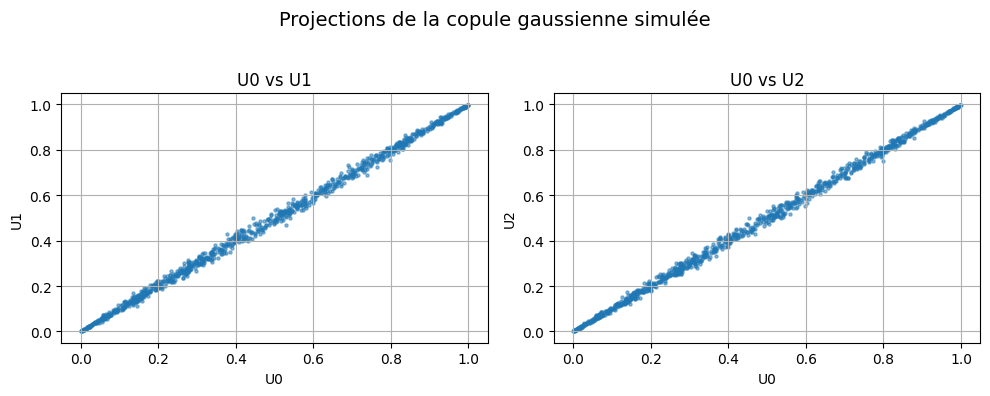

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Paramètres
d = 3  # dimension
rho = 0.999  # corrélation entre les variables
N = 1000  # nombre d'échantillons

# ------------------------------
# Simulation de variable gaussienne centrée réduite
u = np.random.uniform(0, 1, (N, d))
z = norm.ppf(u)

# ------------------------------
# Matrice de covariance
sigma = rho * np.ones((d, d)) + (1 - rho) * np.eye(d)

# Racine carrée de la matrice de covariance
eigvals, eigvecs = np.linalg.eigh(sigma)
sqrt_Lambda = np.diag(np.sqrt(eigvals))
sigma_sqrt = eigvecs @ sqrt_Lambda

X = z @ sigma_sqrt.T

# ------------------------------
# Application de la fonction de répartition Φ pour obtenir la copule:
U = norm.cdf(X)

# ------------------------------
# Visualisation en 2D des projections
plt.figure(figsize=(10, 4))
for i in range(1, d):
    plt.subplot(1, d - 1, i)
    plt.scatter(U[:, 0], U[:, i], alpha=0.5, s=5)
    plt.title(f"U0 vs U{i}")
    plt.xlabel("U0")
    plt.ylabel(f"U{i}")
    plt.grid()

plt.suptitle("Projections de la copule gaussienne simulée", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# ------------------------------

Enfin, en variant la correlation, on vérifie, empiriquement, que $(\Psi(X_1),\dots,\Psi(X_d))$ est un vecteur dont la fonction de répartition est vraiment la copule gaussienne de matrice de covariance $\Sigma$. Par exemple, pour $\rho$ proche de 1, les graphiques de $U_0 \times U_1$ et $U_0 \times U_2$ approximent la diagonale, conforme ce qu'on attendait d'une copule de comonoticité.

---

### Simulation S2:

Dans cette simulation, pour estimer la corrélation entre les variables uniformes de la copule, nous considérons un échantillon $ (U_1^{(i)}, U_2^{(i)}) $ pour $ i = 1, \dots, n $ d'observations simulées et nous calculons:

- le produit empirique : $\widehat{\mu} = \frac{1}{n} \sum_{i=1}^{n} U_1^{(i)} U_2^{(i)}$
- la corrélation empirique : $\widehat{\text{Corr}} = \frac{\widehat{\mu} - \frac{1}{4}}{1/12}$

Ensuite, pour calculer l'intervalle de confiance de la corrélation empirique, on considére la variance empirique de l'estimateur de la correlation: 
$$\widehat{\sigma}^2 = \frac{1}{n - 1} \sum_{i=1}^{n} \left( U_1^{(i)} U_2^{(i)} - \widehat{\mu} \right)^2$$ 
$$\widehat{\sigma_{corr}}^2 = 144 Var(\widehat{\mu}) = 144 \widehat{\sigma}^2$$

Donc, étant donné que l'estimateur est asymptotiquement normal, d'après le résultat le la section 10.3 du polycopié, nous conclusons que l'intervalle de confiance asymptotique au niveau $1-\alpha$ est donnée par la formule ci-dessous, où $\Phi^{-1}$ est la fonction quantile de la loi gaussienne:
   $$
   \left[ \widehat{\text{Corr}} - \Phi^{-1}(1-\frac{\alpha}{2}) \cdot \frac{\widehat{\sigma}}{1/12},\ 
          \widehat{\text{Corr}} + \Phi^{-1}(1-\frac{\alpha}{2}) \cdot \frac{\widehat{\sigma}}{1/12} \right]
   $$


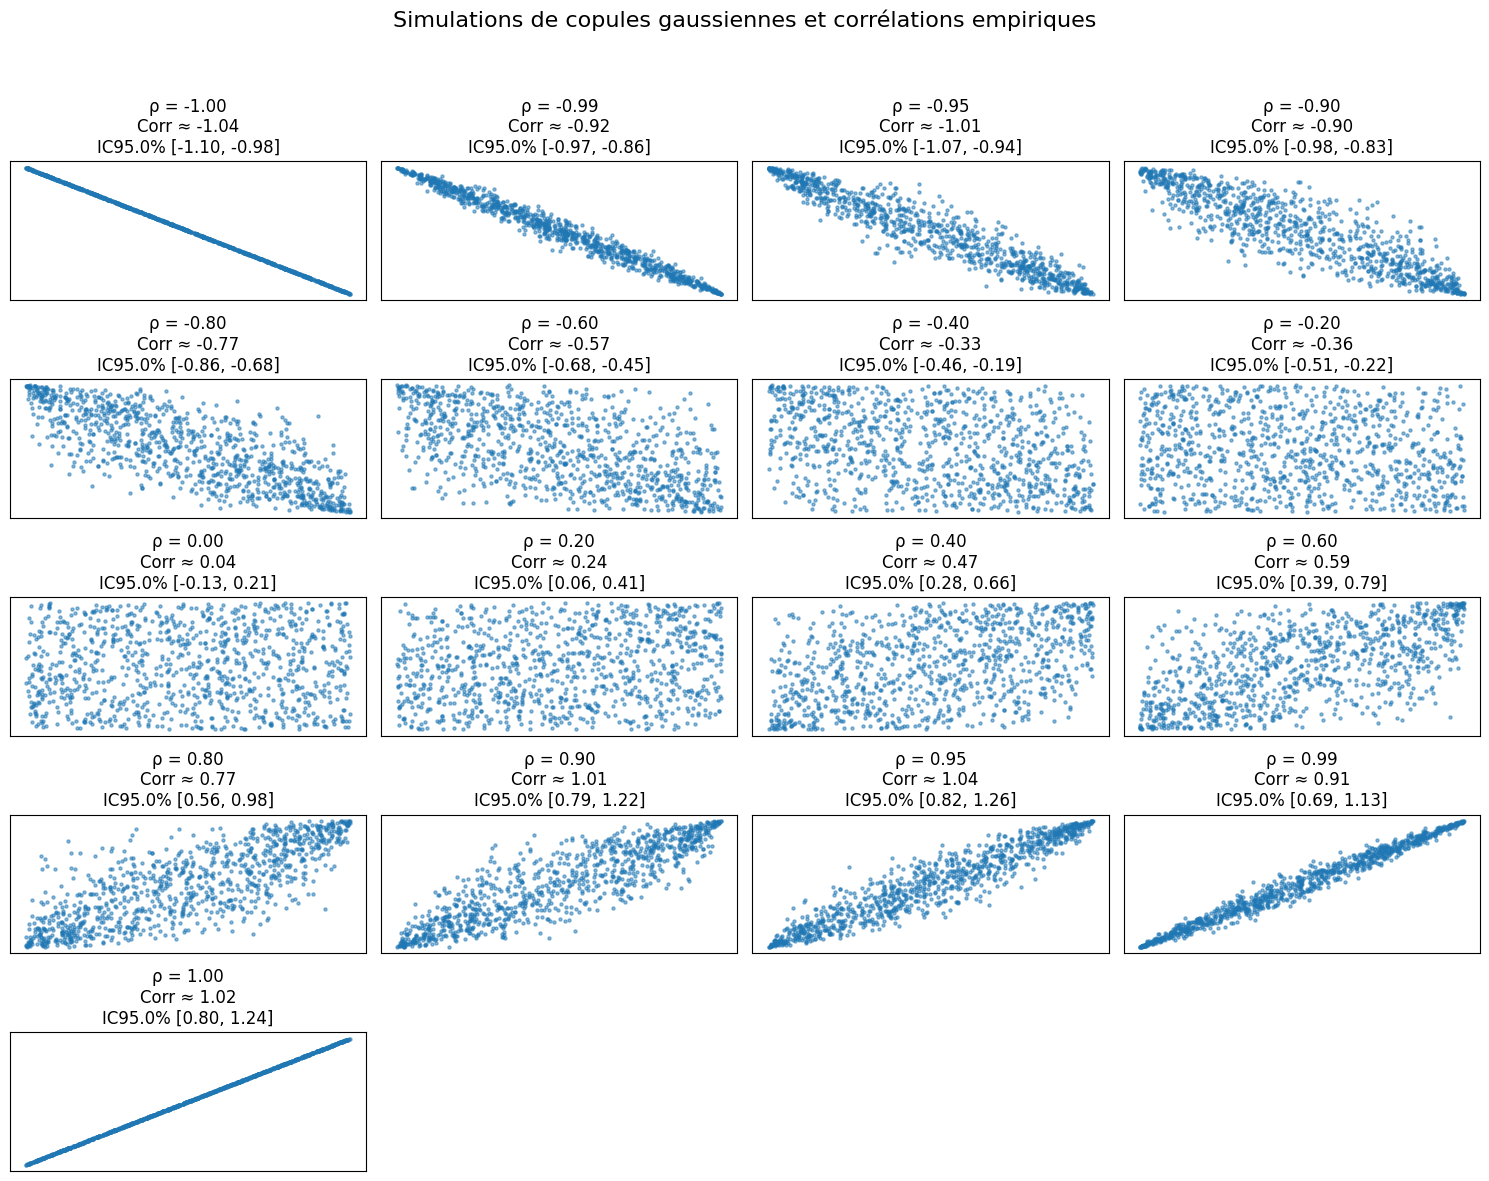


ρ théorique | Corr. estimée |  IC 95%
----------------------------------------
     -1.00 |       -1.0398 | [-1.0963, -0.9834]
     -0.99 |       -0.9162 | [-0.9725, -0.8599]
     -0.95 |       -1.0093 | [-1.0749, -0.9437]
     -0.90 |       -0.9011 | [-0.9751, -0.8272]
     -0.80 |       -0.7685 | [-0.8573, -0.6797]
     -0.60 |       -0.5661 | [-0.6792, -0.4531]
     -0.40 |       -0.3267 | [-0.4643, -0.1891]
     -0.20 |       -0.3614 | [-0.5063, -0.2165]
      0.00 |        0.0404 | [-0.1276, 0.2084]
      0.20 |        0.2357 | [0.0580, 0.4134]
      0.40 |        0.4674 | [0.2766, 0.6583]
      0.60 |        0.5881 | [0.3867, 0.7896]
      0.80 |        0.7685 | [0.5572, 0.9798]
      0.90 |        1.0065 | [0.7886, 1.2243]
      0.95 |        1.0418 | [0.8198, 1.2639]
      0.99 |        0.9089 | [0.6909, 1.1270]
      1.00 |        1.0180 | [0.7983, 1.2377]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy.typing as npt

# ------------------------------
# Simulation d'une copule gaussienne de dimension 2
def simulate_gaussian_copula(rho: npt.NDArray, n: int = 1000) -> npt.NDArray:
    Sigma = np.array([[1, rho], [rho, 1]])
    eigvals = np.linalg.eigvals(Sigma)

    # Décomposition spectrale pour racine
    eigvals, eigvecs = np.linalg.eigh(Sigma)
    sqrt_Lambda = np.diag(np.sqrt(eigvals))
    sigma_sqrt = eigvecs @ sqrt_Lambda

    # Simulation de la loi gaussienne
    u = np.random.uniform(0, 1, (n, 2))
    z = norm.ppf(u)

    # Simulation de X ~ N(0, Σ)
    X = z @ sigma_sqrt.T

    # Application de la fonction de répartition Φ pour obtenir la copule
    U = norm.cdf(X)
    return U


# ------------------------------
# Estimateur de corrélation empirique + IC Monte Carlo
def empirical_correlation_with_ci(U: npt.NDArray, alpha: float=0.05) -> tuple:
    U1, U2 = U[:, 0], U[:, 1]
    prod = U1 * U2
    n = len(prod)
    mu_hat = np.mean(prod)
    var_hat = np.var(prod, ddof=1)
    se = np.sqrt(var_hat / n)

    # Corrélation empirique
    corr_hat = (mu_hat - 0.25) / (1 / 12)

    # Intervalle de confiance à 1 - alpha
    z = norm.ppf(1 - alpha/2)  
    half_width = z * se / (1 / 12)
    ci_low = corr_hat - half_width
    ci_high = corr_hat + half_width

    return corr_hat, (ci_low, ci_high)


# ------------------------------
# Paramètres
rhos = np.concatenate(
    [
        np.array([-1, -0.99, -0.95, -0.9]),
        np.linspace(-0.8, 0.8, 9),
        np.array([0.9, 0.95, 0.99, 1]),
    ]
)
N = 1000  # nombre d'échantillons pour chaque simulation
alpha = 0.05  # niveau de confiance pour l'IC
results = []

# ------------------------------
plt.figure(figsize=(15, 12))

for i, rho in enumerate(rhos):
    U = simulate_gaussian_copula(rho, N)
    corr_hat, (ci_low, ci_high) = empirical_correlation_with_ci(U, alpha)
    results.append((rho, corr_hat, ci_low, ci_high))

    # Nuage de points
    plt.subplot(5, 4, i + 1)
    plt.scatter(U[:, 0], U[:, 1], s=5, alpha=0.5)
    plt.title(
        f"ρ = {rho:.2f}\nCorr ≈ {corr_hat:.2f}\nIC{100*(1-alpha)}% [{ci_low:.2f}, {ci_high:.2f}]"
    )
    plt.xticks([])
    plt.yticks([])

    

plt.suptitle(
    "Simulations de copules gaussiennes et corrélations empiriques", fontsize=16
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ------------------------------
print("\nρ théorique | Corr. estimée |  IC 95%")
print("-" * 40)
for rho, corr, lo, hi in results:
    print(f"{rho:10.2f} | {corr:13.4f} | [{lo:.4f}, {hi:.4f}]")

#### Commentaires
On observe pour les nuages de points que:
- Pour $ \rho = 1 $, les points sont alignés sur la diagonale : $ U_1 = U_2 $.
- Pour $ \rho = -1 $, les points sont alignés sur la diagonale secondaire : $ U_1 + U_2 = 1 $.
- Pour $ \rho = 0 $, le nuage est homogène dans le carré $ [0,1]^2 $, indiquant une apparente indépendance.
- Pour des valeurs intermédiaires, les points sont concentrés le long d'une diagonale selon le signe et l'intensité de $ \rho $.

De plus, on observe que la correlation empirique s'approxime de la correlation de $\rho$ à la mesure que la taille de l'échantillon augmente. De plus,la transformation $X_i \mapsto U_i = \Phi(X_i)$, car elle n'est pas linéaire, contribue à aplatir les queues de la distribution.

---

### Simulation S3

Pour la simulation S3, nous nous rappelons que la transformée de Laplace $\psi(t) = \mathbb{E}[e^{-t\xi}]$ d'un loi $\Gamma(\frac{1}{\theta}, 1)$ et son inverse sont:
$$ \psi(t) = (1+t)^{-\frac{1}{\theta}}, \ \ \ \psi(u)^{-1} = u^{-\theta} - 1$$


C:\Users\thiag\AppData\Local\Temp\ipykernel_22900\2386236576.py:24: RuntimeWarning: divide by zero encountered in divide
  U = psi(logV / xi[:, None], theta)


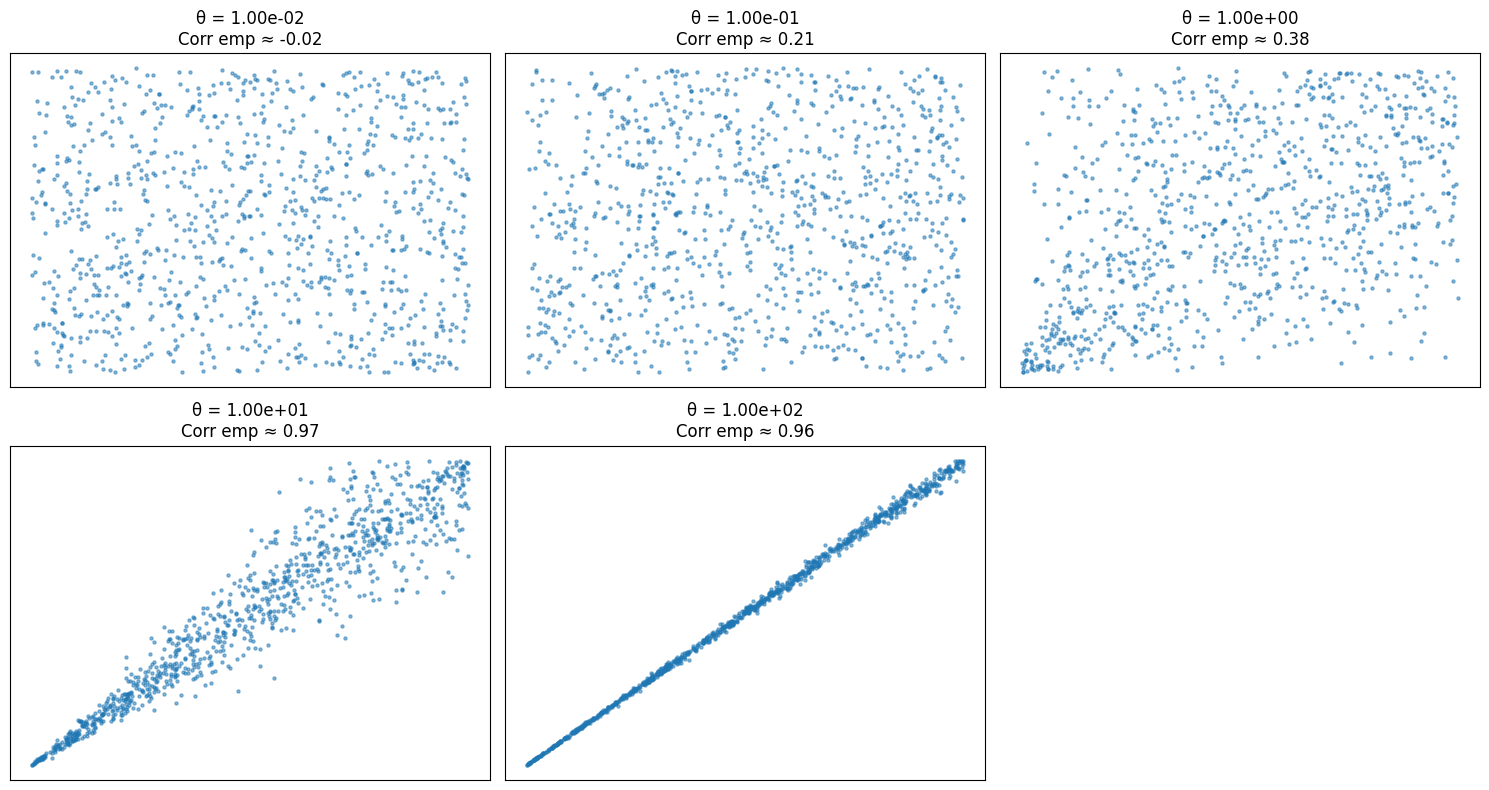


θ vs Corrélation empirique :
θ = 1.00e-02 → Corr emp = -0.02
θ = 1.00e-01 → Corr emp =  0.21
θ = 1.00e+00 → Corr emp =  0.38
θ = 1.00e+01 → Corr emp =  0.97
θ = 1.00e+02 → Corr emp =  0.96


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# ------------------------------
# Fonctions psi et son inverse pour xi ~ Gamma(1/theta, 1)
def psi(t: float, theta: float) -> float:
    return (1 + t) ** (-1 / theta)

def psi_inv(u: float, theta: float) -> float:
    return u ** (-theta) - 1

# ------------------------------
# Simulation de la copule archimédienne
def simulate_archimedean_copula(theta: float, n: int=1000)-> np.ndarray:
    # xi ~ Gamma(1/theta, 1)
    xi = gamma.rvs(a=1/theta, scale=1, size=n)

    # V1, V2 ~ U[0,1]
    V = np.random.uniform(size=(n, 2))

    # U_i = psi(-log(V_i)/xi)
    logV = -np.log(V)
    U = psi(logV / xi[:, None], theta)
    return U

# ------------------------------
# Corrélation empirique sur [0,1]^2
def empirical_correlation(U: np.ndarray) -> float:
    U1, U2 = U[:, 0], U[:, 1]
    est = np.mean(U1 * U2)
    corr = (est - 0.25) / (1/12)
    return corr

# ------------------------------
# Simulation pour différentes valeurs de θ
thetas = [1e-2, 1e-1, 1, 10, 100]
N = 1000
emp_corrs_arch = []

plt.figure(figsize=(15, 8))

for i, theta in enumerate(thetas):
    U = simulate_archimedean_copula(theta, N)
    corr_emp = empirical_correlation(U)
    emp_corrs_arch.append((theta, corr_emp))

    # Nuage de points
    plt.subplot(2, 3, i + 1)
    plt.scatter(U[:, 0], U[:, 1], s=5, alpha=0.5)
    plt.title(f"θ = {theta:.2e}\nCorr emp ≈ {corr_emp:.2f}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# ------------------------------
# Affichage texte des résultats
print("\nθ vs Corrélation empirique :")
for theta, corr in emp_corrs_arch:
    print(f"θ = {theta:>7.2e} → Corr emp = {corr:>5.2f}")

#### Commentaires
Les résultats montrent que la dépendance entre $U_1$ et $U_2$ est d’autant plus forte que $\theta$ est grand : pour $\theta = 100$, les points sont très concentrés près de la diagonale. À l’inverse, pour $\theta = 0.01$, la dépendance est presque nulle et la copule se rapproche de l’indépendance. Contrairement à la copule gaussienne, ici la dépendance est plus directement contrôlée par $\theta$ sans transformation non linéaire, et la corrélation n'atteint que des valeurs positives, mais que peuvent être très proches de 1, ce qui illustre la capacité des copules archimédiennes à modéliser des dépendances positives extrêmes. En comparaison avec les copules gaussiennes, nous observons que la dispersion entre les points simulés augmente à la mesure que les variables uniformes sont proches de 1, tandis que, pour les copules gaussiennes, la dispersion est plus intense au centre de la $U_1 \times U_2$.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# ------------------------------
# Paramètres
d = 100
lambda_ = 0.02
T = 5
n_vals = [5, 10, 30]
n_sim = 10000


# ------------------------------
# Fonction de simulation des temps de défaut à partir de U
def simulate_defaults(U: npt.NDArray, T: float | int) -> npt.NDArray:
    T_i = -np.log(U) / lambda_
    n_defaut = np.sum(T_i <= T, axis=1)
    return n_defaut


# ------------------------------
# Estimateur de P(N >= n)
def estimate_p_ge_n(N: npt.NDArray, n: int) -> float:
    return np.mean(N >= n)

# ------------------------------
# Copule archimédienne (θ=0.1)
def simulate_archimedean_d_dim(theta: float, d: int, n: int) -> npt.NDArray:
    # xi ~ Gamma(1/theta, 1)
    xi = gamma.rvs(a=1/theta, scale=1, size=n)

    # V1, V2 ~ U[0,1]
    V = np.random.uniform(size=(n, d))

    # U_i = psi(-log(V_i)/xi)
    logV = -np.log(V)
    U = psi(logV / xi[:, None], theta)
    return U


# ------------------------------
def simulate_gaussian_d_dim(rho: float, d: int, n: int) -> npt.NDArray:
    sigma = rho * np.ones((d, d)) + (1 - rho) * np.eye(d)

    # Décomposition spectrale pour racine
    eigvals, eigvecs = np.linalg.eigh(sigma)
    sqrt_Lambda = np.diag(np.sqrt(eigvals))
    sigma_sqrt = eigvecs @ sqrt_Lambda

    # Simulation de la loi gaussienne
    u = np.random.uniform(0, 1, (n, d))
    z = norm.ppf(u)

    # Simulation de X ~ N(0, Σ)
    X = z @ sigma_sqrt.T

    # Application de la fonction de répartition Φ pour obtenir la copule
    U = norm.cdf(X)
    return U


# ------------------------------
# Exécution pour les 3 cas
results = {}

# (a) Archimédienne θ=0.1
U_a = simulate_archimedean_d_dim(theta=0.1, d=d, n=n_sim)
N_a = simulate_defaults(U_a, T=T)
results["Arch(θ=0.1)"] = [estimate_p_ge_n(N_a, n) for n in n_vals]

# (b) 1 - Archimédienne θ=0.1
U_b = 1 - simulate_archimedean_d_dim(theta=0.1, d=d, n=n_sim)
N_b = simulate_defaults(U_b, T=T)
results["1 - Arch(θ=0.1)"] = [estimate_p_ge_n(N_b, n) for n in n_vals]

# (c1) Gaussienne ρ=0.5
U_c1 = simulate_gaussian_d_dim(rho=0.5, d=d, n=n_sim)
N_c1 = simulate_defaults(U_c1, T=T)
results["Gauss(ρ=0.5)"] = [estimate_p_ge_n(N_c1, n) for n in n_vals]

# (c2) Gaussienne ρ=0.9
U_c2 = simulate_gaussian_d_dim(rho=0.9, d=d, n=n_sim)
N_c2 = simulate_defaults(U_c2, T=T)
results["Gauss(ρ=0.9)"] = [estimate_p_ge_n(N_c2, n) for n in n_vals]

# ------------------------------
print("Probabilités estimées P(N ≥ n):\n")
header = f"{'n':>5} | " + " | ".join([f"{k:^20}" for k in results.keys()])
print(header)
print("-" * len(header))

for i, n in enumerate(n_vals):
    row = f"{n:5d} | " + " | ".join([f"{results[k][i]:^20.4f}" for k in results])
    print(row)

Probabilités estimées P(N ≥ n):

    n |     Arch(θ=0.1)      |   1 - Arch(θ=0.1)    |     Gauss(ρ=0.5)     |     Gauss(ρ=0.9)    
-------------------------------------------------------------------------------------------------
    5 |        0.9056        |        0.6989        |        0.4326        |        0.2066       
   10 |        0.4627        |        0.3938        |        0.2864        |        0.1723       
   30 |        0.0000        |        0.0222        |        0.0959        |        0.1162       


#### Commentaires
Les résultats montrent que la structure de dépendance a un impact important sur la queue de distribution du nombre de défauts. Dans le cas (a), où la dépendance faible et positive (faible $\theta$), les défauts tendent à se produire de manière isolée, de sorte que la probabilité d'ocurrir un défaut conjoint de plus de 30 entreprises est presque nulle. À l’inverse, dans le cas (b), la dépendance est anti-monotone, ce qui augmente la probabilité d’observer plusieurs défauts simultanés. Les copules gaussiennes, quant à elles, produisent des comportements intermédiaires : une corrélation de $\rho = 0.5$ donne des résultats plus proches de l’indépendance, tandis que $\rho = 0.9$ montre un effet de clustering plus marqué. Cette analyse illustre que, à marges fixées, le choix de la copule est crucial pour évaluer les risques extrêmes, et notamment pour la modélisation du risque dans un portefeuille de crédit.

---